In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import  load_model
import streamlit as st
from tensorflow import keras
from tensorflow.keras import layers
import cv2

In [2]:
data_train_path = 'images/train'
data_test_path = 'images/test'
data_val_path = 'images/validation'
img_width = 224
img_height =224 
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)
data_cat = data_train.class_names
data_cat

Found 930 files belonging to 2 classes.


['Aung', 'BhoneMyat']

In [3]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 516 files belonging to 2 classes.


Found 180 files belonging to 2 classes.


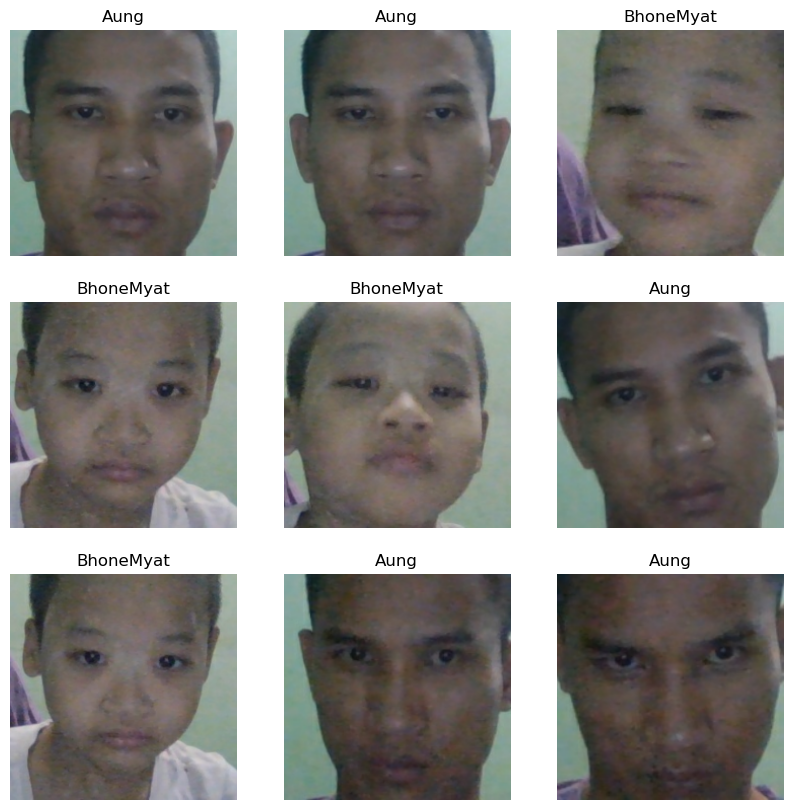

In [4]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [4]:
from tensorflow.keras.models import Sequential
data_train
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [5]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])


In [7]:
epochs_size = 50
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 18s 483ms/step - accuracy: 0.8322 - loss: 0.7569 - val_accuracy: 1.0000 - val_loss: 0.0112
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 381ms/step - accuracy: 1.0000 - loss: 0.0046 - val_accuracy: 1.0000 - val_loss: 2.1919e-04
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 388ms/step - accuracy: 1.0000 - loss: 1.1069e-04 - val_accuracy: 1.0000 - val_loss: 7.5783e-05
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 386ms/step - accuracy: 1.0000 - loss: 4.8979e-05 - val_accuracy: 1.0000 - val_loss: 3.7306e-05
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 377ms/step - accuracy: 1.0000 - loss: 2.2403e-05 - val_accuracy: 1.0000 - val_loss: 2.5108e-05
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 385ms/step - accuracy: 1.0000 - loss: 1.4035e-05 - val_accuracy: 1.0000 - val_loss: 1.9356e-05
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 399ms/step - accuracy: 1.0000 - loss: 7.3820e-06 - val_accuracy: 1.0000 - val_loss: 1.2292e-05
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 386ms/step 

Epoch 49/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 389ms/step - accuracy: 1.0000 - loss: 1.1941e-07 - val_accuracy: 1.0000 - val_loss: 4.2416e-07
Epoch 50/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 13s 438ms/step - accuracy: 1.0000 - loss: 1.4561e-07 - val_accuracy: 1.0000 - val_loss: 3.8027e-07


In [7]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

NameError: name 'epochs_size' is not defined

In [8]:
image = '24.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Waste in image is Aung with accuracy of 100.00


Text(0.5, 1.0, 'Aung')

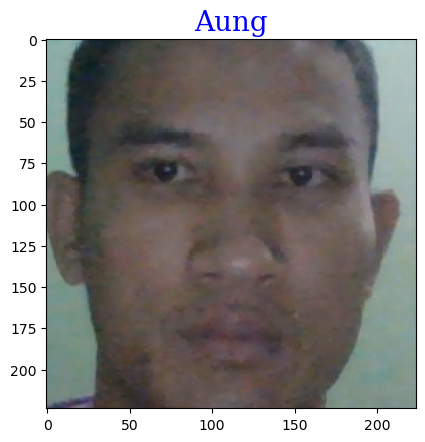

In [12]:
predict = model.predict(img_bat)
score = tf.nn.softmax(predict)
print('Waste in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))
plt.imshow(image)
font1 = {'family':'serif','color':'blue','size':20}
plt.title(data_cat[np.argmax(score)], fontdict = font1)

In [9]:
model.save('face_recog.h5')